<a href="https://colab.research.google.com/github/suhayb-h/mmscel-integration-team-1/blob/main/Group_1_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Google drive
import drive

In [51]:
# metadata.csv
df_meta_1 = pd.read_csv("/content/drive/Othercomputers/My MacBook Air/Multimodal Cell/metadata.csv")
print(df_meta_1)
print("There are four unique donors for this csv:", df_meta_1['donor'].unique())
print("There are four unique 'days' for this dataframe:", df_meta_1['day'].unique())
print("There are two unique values for 'technology':", df_meta_1['technology'].unique())

# Should we set the index to cell_id?

             cell_id  day  donor cell_type technology
0       c2150f55becb    2  27678       HSC    citeseq
1       65b7edf8a4da    2  27678       HSC    citeseq
2       c1b26cb1057b    2  27678      EryP    citeseq
3       917168fa6f83    2  27678      NeuP    citeseq
4       2b29feeca86d    2  27678      EryP    citeseq
...              ...  ...    ...       ...        ...
281523  96a60b026659   10  31800    hidden   multiome
281524  d493e546991e   10  31800    hidden   multiome
281525  05666c99aa48   10  31800    hidden   multiome
281526  121f946642b5   10  31800    hidden   multiome
281527  b847ba21f59f   10  31800    hidden   multiome

[281528 rows x 5 columns]
There are four unique donors for this csv: [27678 32606 13176 31800]
There are four unique 'days' for this dataframe: [ 2  3  4  7 10]
There are two unique values for 'technology': ['citeseq' 'multiome']


In [52]:
# There are only two divisions, so I split the dataframe into two tables. 

df_meta_1_multiome = df_meta_1[df_meta_1['technology'] == 'multiome']
df_meta_1_citeseq = df_meta_1[df_meta_1['technology'] == 'citeseq']
print(df_meta_1_multiome['cell_type'].value_counts())
print("Multiome has", df_meta_1_multiome['cell_type'].nunique(), "unique cell types")
print()

hidden    55935
HSC       34661
NeuP      21561
EryP      17135
MasP      16737
MkP       13221
MoP        2061
BP          566
Name: cell_type, dtype: int64
Multiome has 8 unique cell types



There's a `hidden` cell type that accounts for the `cell_type` with the highest count in multimodal. Why?
`hidden` cells are not found in the `citeseq` dataframe as shown below:

In [53]:
print(df_meta_1_citeseq['cell_type'].value_counts())
print("citeseq has", df_meta_1_citeseq['cell_type'].nunique(), "unique cell types")

# "hidden" cells are not found in citeseq
# BP and MoP have pretty low cell counts for multiome and citeseq. Get rid of them for now?

HSC     42874
EryP    24344
NeuP    21418
MasP    18090
MkP     10800
MoP      1822
BP        303
Name: cell_type, dtype: int64
citeseq has 7 unique cell types


In [54]:
#metadata_cite_day_2_donor_27678.csv
df_meta_2 = pd.read_csv('/content/drive/Othercomputers/My MacBook Air/Multimodal Cell/metadata_cite_day_2_donor_27678.csv')
print(df_meta_2)
print("There is only ", df_meta_2['technology'].nunique(), " value in the 'technology' column.")
print("There is only ", df_meta_2['day'].nunique(), " value in the 'day' column.")
print("There is only ", df_meta_2['donor'].nunique(), " value in the 'donor' column")

           cell_id  day  donor cell_type technology
0     83d6659a6a32    2  27678      NeuP    citeseq
1     d98594f13d2e    2  27678      NeuP    citeseq
2     5f93d8ffc72f    2  27678      NeuP    citeseq
3     7dfa2699d351    2  27678      EryP    citeseq
4     6d2533edd0e0    2  27678       HSC    citeseq
...            ...  ...    ...       ...        ...
7011  be92120b3a00    2  27678       HSC    citeseq
7012  396d0c31d41c    2  27678       HSC    citeseq
7013  ef6bf272cdcf    2  27678      EryP    citeseq
7014  6339da0de3a0    2  27678       HSC    citeseq
7015  397bef68ded6    2  27678       HSC    citeseq

[7016 rows x 5 columns]
There is only  1  value in the 'technology' column.
There is only  1  value in the 'day' column.
There is only  1  value in the 'donor' column


PLEASE NOTE: `day 2` and `donor 27678` exist in `df_meta_1` too. Are these the same values? If not, can we create a new dataframe with only the data for `donor 27678` on `day 2`? I explored `df_meta_1` a little further in the cell below:

In [55]:
print('These are the unique "donors" on "day 2":',df_meta_1[df_meta_1['day'] == 2]['donor'].unique())
print('These are the unique "days" for "donor 27678":',df_meta_1[df_meta_1['donor'] == 27678]['day'].unique())

These are the unique "donors" on "day 2": [27678 32606 13176 31800]
These are the unique "days" for "donor 27678": [ 2  3  4  7 10]


In [56]:
#I deleted the three columns with only 1 value in them
df_meta_2 = df_meta_2[['cell_id', 'cell_type']]
df_meta_2

# Should we set the index to cell_id?

,cell_id,cell_type
0,83d6659a6a32,NeuP
1,d98594f13d2e,NeuP
2,5f93d8ffc72f,NeuP
3,7dfa2699d351,EryP
4,6d2533edd0e0,HSC
...,...,...
7011,be92120b3a00,HSC
7012,396d0c31d41c,HSC
7013,ef6bf272cdcf,EryP
7014,6339da0de3a0,HSC


What's next here? I took a look at `evaluation_ids.csv` but I'm not really sure what to do with this dataframe. I will take a look at the h5s hopefully sometime soon.

In [59]:
#Might be the only H5 file I can work with in co-lab
train_cite_targets = pd.read_hdf('/content/drive/Othercomputers/My MacBook Air/Multimodal Cell/train/train_cite_targets.h5')
train_cite_targets.head()

#are gene id and cell id the same?

gene_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD94,CD162,CD85j,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,1.167804,0.622530,0.106959,0.324989,3.331674,6.426002,1.480766,-0.728392,-0.468851,-0.073285,...,-0.448390,3.220174,-0.533004,0.674956,-0.006187,0.682148,1.398105,0.414292,1.780314,0.548070
d02759a80ba2,0.818970,0.506009,1.078682,6.848758,3.524885,5.279456,4.930438,2.069372,0.333652,-0.468088,...,0.323613,8.407108,0.131301,0.047607,-0.243628,0.547864,1.832587,0.982308,2.736507,2.184063
c016c6b0efa5,-0.356703,-0.422261,-0.824493,1.137495,0.518924,7.221962,-0.375034,1.738071,0.142919,-0.971460,...,1.348692,4.888579,-0.279483,-0.131097,-0.177604,-0.689188,9.013709,-1.182975,3.958148,2.868600
ba7f733a4f75,-1.201507,0.149115,2.022468,6.021595,7.258670,2.792436,21.708519,-0.137913,1.649969,-0.754680,...,1.504426,12.391979,0.511394,0.587863,-0.752638,1.714851,3.893782,1.799661,1.537249,4.407671
fbcf2443ffb2,-0.100404,0.697461,0.625836,-0.298404,1.369898,3.254521,-1.659380,0.643531,0.902710,1.291877,...,0.777023,6.496499,0.279898,-0.841950,-0.869419,0.675092,5.259685,-0.835379,9.631781,1.765445


DBSCAN requires ε and minPts parameters for clustering. The minPts should be 2 * number of dimensions. How many dimensions does our dataset have? I assume equal to the number of proteins we are testing for (139).

Another question is what optimal value should be used for the ε parameter. The ε should be as small as possible.

To determine the optimal ε parameter, I computed kNN distances of the dataset which seems to be 31.

NearestNeighbors function requires n_neighbors parameter, which can be same as minPts.

In [68]:
# Setting up a workflow for DBSCAN

# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 140).fit(train_cite_targets)

# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(train_cite_targets)

# sort the neighbor distances (lengths to points) in ascending order

# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

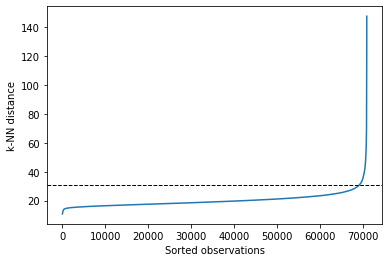

In [74]:
k_dist = sort_neigh_dist[:, 139]
plt.plot(k_dist)
plt.axhline(y=31, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Observations")
plt.show()

I am pretty lost now.

In [106]:
clusters = DBSCAN(eps=31, min_samples = 2).fit(train_cite_targets) 

# min_samples of 140/139/138 didn't work. Why?
# I assumed every protein would be its own dimension

# size of clusters
from collections import Counter
Counter(clusters.labels_)

Counter({0: 70620,
         1: 2,
         -1: 336,
         2: 3,
         3: 4,
         4: 2,
         5: 2,
         6: 2,
         7: 2,
         8: 2,
         9: 2,
         10: 2,
         11: 5,
         12: 2,
         13: 2})

This doesn't look right, so I am going to try dimensionality reduction:

In [87]:
from sklearn.decomposition import PCA
pca_scores = PCA().fit_transform(train_cite_targets)
# create a dataframe of pca_scores
df_pc = pd.DataFrame(pca_scores)
df_pc

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-7.525030,-12.558118,2.380706,2.718330,-0.676174,-3.108421,-0.657428,2.210909,0.247383,0.816493,...,0.185303,-0.032766,0.382750,0.475827,-0.781302,-1.097074,-0.148985,-0.167960,-0.259892,0.058255
1,1.978779,-7.906484,0.785588,3.030117,-0.344285,3.517043,1.516356,0.877328,-3.862547,8.085734,...,0.348816,0.587082,-0.034036,-0.076281,-0.180985,0.154285,0.043255,-0.241647,-0.344999,0.062972
2,-25.283350,6.183615,-0.178036,4.209314,-4.927933,-1.748482,7.325980,0.664383,1.676953,1.150972,...,-0.985925,0.014761,-0.272313,-0.046797,0.539447,-0.322546,0.235603,0.303150,-0.276236,0.044685
3,1.248939,-5.633906,-13.799919,7.458139,6.093174,-6.315360,0.994245,-13.248341,-2.013693,6.574844,...,0.452619,0.090335,0.379110,0.165832,1.125278,0.291205,-0.162613,0.014029,0.350795,-0.204992
4,-26.665516,2.084846,-3.204343,-2.670023,-6.642433,3.304994,0.650556,-1.700943,-1.105077,2.793378,...,0.158538,-0.130908,-0.201369,-0.135668,0.627202,0.240589,-0.047375,-0.073318,0.342708,-0.111790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70983,-5.389494,-11.245906,4.687128,-1.677875,0.136728,0.985630,-0.116688,2.284427,-3.045842,-0.875124,...,0.595492,-0.241973,-0.213771,0.121932,-0.051698,0.163511,0.458737,-0.774312,1.029724,0.005768
70984,-26.143284,9.761373,3.051148,2.277073,-0.867947,-1.373903,4.237640,-2.451195,-0.716602,0.330073,...,0.949291,-0.120124,0.420223,-0.845060,0.088885,-0.222363,0.345999,0.683910,0.088845,0.202829
70985,-23.188305,18.982414,6.915957,6.728989,-10.609976,3.362081,4.553707,0.433657,-4.065332,-5.156770,...,-0.230411,0.022758,0.398056,-0.907586,-0.086608,-0.518459,0.802368,-0.094947,0.395769,-0.215593
70986,-11.028251,-2.937629,-8.785558,-3.181473,3.113479,1.256991,6.074982,2.463936,3.499693,0.611424,...,0.813809,-0.133261,0.531208,-0.247157,0.707222,0.433925,0.353699,-0.281345,0.531354,-0.103720


In [89]:
#TSNE has been used for dimensionality reduction in RNAseq problems before:
from sklearn.manifold import TSNE
tsne_em = TSNE(
    n_components = 2, # why is this 2 and not 140
    perplexity = 45,
      # dataset with larger number of variables requires larger perplexity
      # set value between 5 and 50 (sklearn documentation)
    early_exaggeration = 12, # no idea what this is
    n_iter = 1000, # set n_iter sufficiently high to resolve the well stabilized cluster
    learning_rate = 368, 
    verbose = 1 # display run-time messages
    ).fit_transform(df_pc.loc[:,0:49]) #only using the first 49 pc's

# Apparently if you keep running this cell, KL divergence drops. 
#   I don't feel as though this would have a substantial impact.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 70988 samples in 0.003s...
[t-SNE] Computed neighbors for 70988 samples in 106.385s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70988
[t-SNE] Computed conditional probabilities for sample 2000 / 70988
[t-SNE] Computed conditional probabilities for sample 3000 / 70988
[t-SNE] Computed conditional probabilities for sample 4000 / 70988
[t-SNE] Computed conditional probabilities for sample 5000 / 70988
[t-SNE] Computed conditional probabilities for sample 6000 / 70988
[t-SNE] Computed conditional probabilities for sample 7000 / 70988
[t-SNE] Computed conditional probabilities for sample 8000 / 70988
[t-SNE] Computed conditional probabilities for sample 9000 / 70988
[t-SNE] Computed conditional probabilities for sample 10000 / 70988
[t-SNE] Computed conditional probabilities for sample 11000 / 70988
[t-SNE] Computed conditional probabilities for sample 12000 / 70988
[t-SNE] Computed conditional probabilities for 

In [100]:
# install
!pip install bioinfokit
!pip install bioinfokit --upgrade
from bioinfokit.visuz import cluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
cluster.tsneplot(score=tsne_em, legendpos='upper right', legendanchor=(1.15, 1))

In [58]:
# A lot of dataframes won't load. Issue with google drive? Might redownload the dataset on my own time. 
train_cite_inputs_day2 = pd.read_hdf('/content/drive/Othercomputers/My MacBook Air/Multimodal Cell/test/test_cite_inputs_day_2_donor_27678.h5')
train_cite_inputs_day2

FileNotFoundError: ignored